# MICRO CREDIT DEFAULTER

   A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

   We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv')
pd.options.display.max_columns=None
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

##### About the Columns :
label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn : mobile number of user

aon : age on cellular network in days

daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30 : Average main account balance over last 30 days

rental90 : Average main account balance over last 90 days

last_rech_date_ma : Number of days till last recharge of main account

last_rech_date_da : Number of days till last recharge of data account

last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30 : Number of times main account got recharged in last 30 days

fr_ma_rech30 : Frequency of main account recharged in last 30 days

sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90 : Number of times main account got recharged in last 90 days

fr_ma_rech90 : Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)

medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)

medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)

cnt_da_rech30 : Number of times data account got recharged in last 30 days

fr_da_rech30 : Frequency of data account recharged in last 30 days

cnt_da_rech90 : Number of times data account got recharged in last 90 days

fr_da_rech90 : Frequency of data account recharged in last 90 days

cnt_loans30 : Number of loans taken by user in last 30 days

amnt_loans30 : Total amount of loans taken by user in last 30 days

maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days

medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days

cnt_loans90 : Number of loans taken by user in last 90 days

amnt_loans90 : Total amount of loans taken by user in last 90 days

maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days

medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days

payback30 : Average payback time in days over last 30 days

payback90 : Average payback time in days over last 90 days

pcircle : telecom circle

pdate : date

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

### Description

In [7]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


<AxesSubplot:>

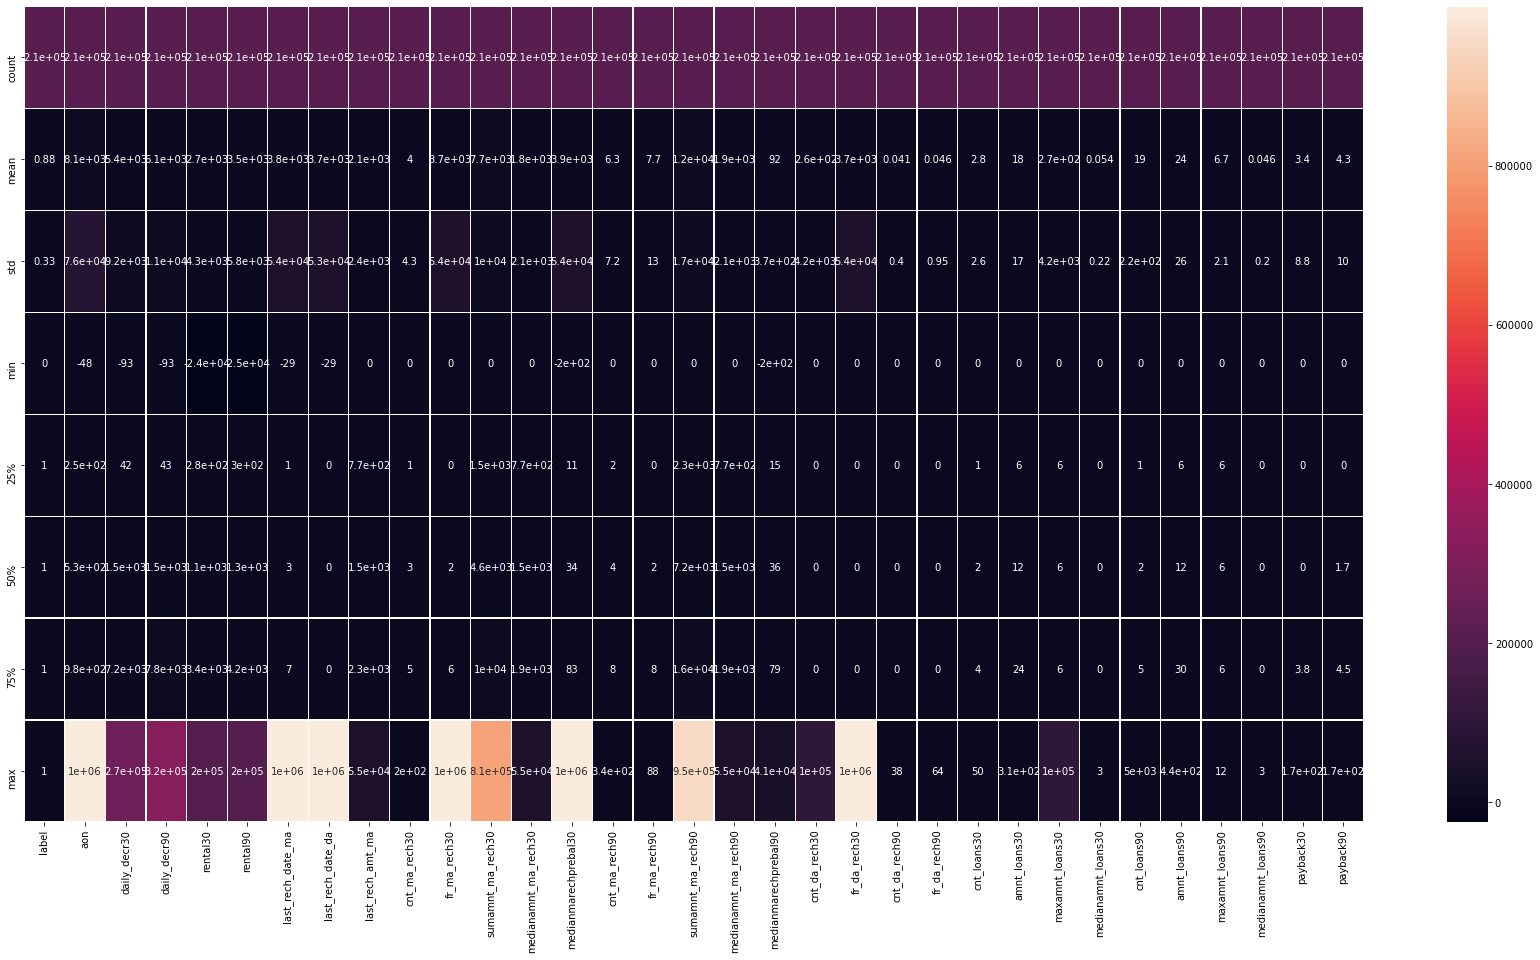

In [8]:
plt.figure(figsize=(30,15))
sns.heatmap(df.describe(),annot=True,linewidths=0.2)

###### We see the description of given dataset. From description we can see the mean,standard deviation of column,minimum value, maximum value in column.

In [9]:
df[df['msisdn'].duplicated()]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1902,1,09901I95206,138.000000,900.000000,900.000000,434.78,434.78,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-17
2280,1,14791I90583,1659.000000,124.754667,124.754667,813.45,813.45,1.0,0.0,4048,5,0.0,9612.0,2309.0,16.07,6,31,11332,2014.5,19.57,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,2.333333,2.333333,UPW,2016-06-11
2395,1,70401I85339,1419.000000,616.160000,619.100000,556.88,589.76,1.0,0.0,773,5,6.0,6160.0,1539.0,32.00,6,53,6933,1156.0,44.50,0.0,0.0,0,0,4,24,6.0,0.5,4.0,24,6,0.5,8.500000,8.500000,UPW,2016-07-02
2909,1,40881I89238,108.000000,96.616000,96.616000,674.83,674.83,48.0,0.0,11327,0,0.0,0.0,0.0,0.00,1,0,11327,11327.0,43.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-13
3674,1,41251I91190,363.000000,8615.000000,8713.490000,498.81,2356.11,5.0,0.0,770,4,9.0,3849.0,770.0,27.50,10,2,12499,1539.0,28.00,0.0,0.0,0,0,4,24,6.0,0.0,8.0,48,6,0.0,4.666667,4.000000,UPW,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209576,1,70448I82734,811881.372822,149.760000,149.760000,922.20,922.20,4.0,0.0,12500,3,9.0,26567.0,10000.0,161.00,3,9,26567,10000.0,161.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,5.500000,5.500000,UPW,2016-06-15
209577,1,60261I84455,1007.000000,5079.832000,5104.540000,2844.84,3064.68,2.0,0.0,1539,10,3.0,11560.0,1156.0,68.70,15,3,16191,773.0,69.20,0.0,0.0,0,0,6,36,6.0,0.0,6.0,36,6,0.0,1.600000,1.600000,UPW,2016-07-06
209586,1,60331I70370,254.000000,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,1539,9,4.0,17243.0,1547.0,37.00,17,2,33719,1547.0,37.00,0.0,0.0,0,0,6,66,12.0,0.0,15.0,120,12,0.0,3.000000,2.400000,UPW,2016-07-22
209589,1,95583I84455,1075.000000,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12


In [10]:
df[df['msisdn'] == '95583I84455']

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
115248,1,95583I84455,1141.0,4129.170,4175.340,24460.14,26620.59,2.0,0.0,770,6,3.0,6158.0,770.0,47.05,14,2,11736,771.5,50.55,0.0,0.0,0,0,3,18,6.0,0.0,7.0,42,6,0.0,7.333333,4.5,UPW,2016-07-15
209589,1,95583I84455,1075.0,36.936,36.936,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.0,UPW,2016-06-12


In [11]:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 36)

###### In the given dataset 'msisdn ' column represents the mobile number of users and we can see that lots of duplicate values are present in msisdn column, so we dropped the duplicate values.

In [12]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [13]:
df.drop('pcircle',axis=1,inplace=True)
df.shape

(186243, 35)

###### We dropped the 'pcircle' column because it has unique value 'UPW'.

In [14]:
(df['aon']<0).sum()

1448

<AxesSubplot:ylabel='Frequency'>

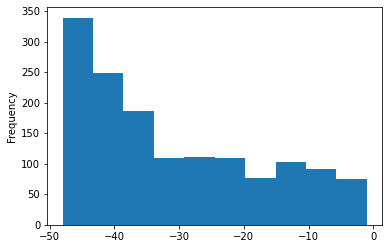

In [15]:
df['aon'][df['aon']<0.8].plot(kind='hist')

###### 1448 negative values are present in 'aon' column.

In [16]:
(df['daily_decr30']<0).sum()

1833

<AxesSubplot:ylabel='Frequency'>

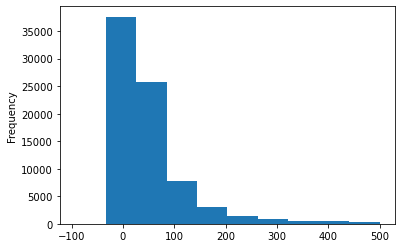

In [17]:
df['daily_decr30'][df['daily_decr30']<500].plot(kind='hist')

###### 1833 negative values are present in 'daily_decr30' column.

In [19]:
(df['daily_decr90']<0).sum()

1833

<AxesSubplot:ylabel='Frequency'>

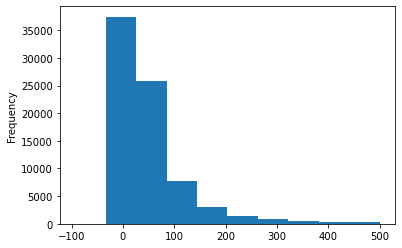

In [20]:
df['daily_decr90'][df['daily_decr90']<500].plot(kind='hist')

###### 1833 negative values are present in 'daily_decr90' column.

In [21]:
(df['rental30']<0).sum()

5087

<AxesSubplot:ylabel='Frequency'>

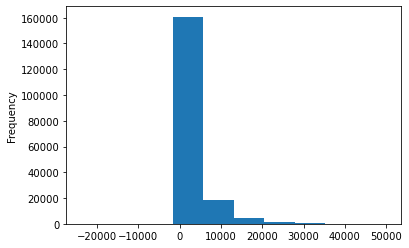

In [22]:
df['rental30'][df['rental30']<50000].plot(kind='hist')

###### 5087 negative values are present in 'rental30' column.

In [23]:
(df['rental90']<0).sum()

5365

<AxesSubplot:ylabel='Frequency'>

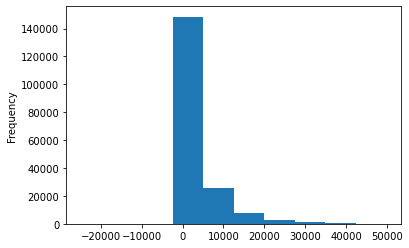

In [24]:
df['rental90'][df['rental90']<50000].plot(kind='hist')

###### 5365 negative values are present in 'rental90' column.

In [25]:
(df['last_rech_date_ma']<0).sum()

1153

<AxesSubplot:ylabel='Frequency'>

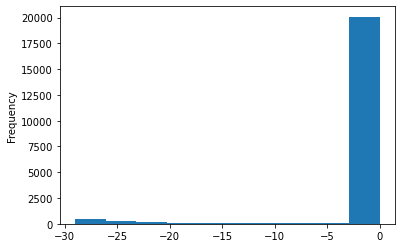

In [26]:
df['last_rech_date_ma'][df['last_rech_date_ma']<1.0].plot(kind='hist')

###### 1153 negative values are present in 'last_rech_date_ma' column.

In [27]:
(df['last_rech_date_da']<0).sum()

13

<AxesSubplot:ylabel='Frequency'>

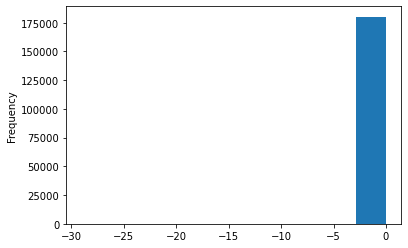

In [28]:
df['last_rech_date_da'][df['last_rech_date_da']<1.0].plot(kind='hist')

###### 13 negative values are present in 'last_rech_date_da' column.

In [29]:
(df['medianmarechprebal30']<0).sum()

1479

<AxesSubplot:ylabel='Frequency'>

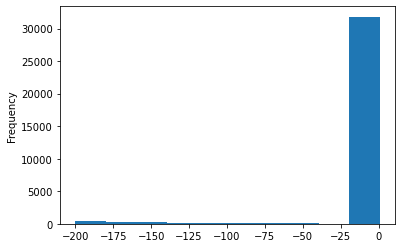

In [30]:
df['medianmarechprebal30'][df['medianmarechprebal30']<0.6].plot(kind='hist')

###### 1479 negative values are present in 'medianmarechprebal30' column.

In [31]:
(df['medianmarechprebal90']<0).sum()

1558

<AxesSubplot:ylabel='Frequency'>

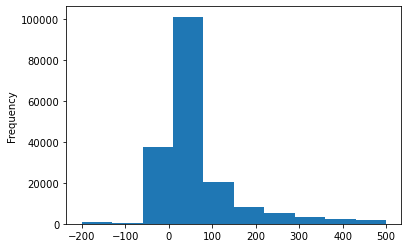

In [32]:
df['medianmarechprebal90'][df['medianmarechprebal90']<500].plot(kind='hist')

###### 1558 negative values are present in 'medianmarechprebal90' column.

### Correlation

In [33]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,0.001129,0.207727,0.149780,-0.004835,0.245941,0.094709,0.212666,0.129527,0.041728,0.004184,-0.000137,0.003601,-0.005779,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,-0.000436,-0.000397,0.004446,0.004221,-0.003957,0.005517,0.000160,0.005022,-0.001128,0.002445,0.000806,0.000868,0.006379,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,0.000766,0.630202,0.307440,-0.000854,0.576787,-0.061858,0.754042,0.269721,0.042276,0.000312,-0.002442,0.038944,0.019874,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,0.001091,0.597542,0.294838,-0.000688,0.582115,-0.063740,0.759865,0.262627,0.041210,-0.000128,-0.002189,0.031408,0.015944,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,0.000272,0.258656,0.132083,-0.001112,0.295746,-0.022353,0.324302,0.113115,0.029945,-0.001286,-0.001917,0.073169,0.047579,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,0.001057,0.246626,0.122747,-0.001047,0.329330,-0.024882,0.342772,0.106832,0.032886,-0.001307,-0.001997,0.057332,0.037829,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,-0.001165,0.002544,-0.002716,0.004216,0.006131,0.000881,0.002345,-0.001947,-0.001506,-0.003344,-0.003469,-0.003700,-0.002232,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,0.000958,0.000080,0.000184,0.003673,0.001924,0.001071,-0.000296,-0.000321,0.004731,-0.003807,0.000455,-0.001229,0.000210,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,0.002998,0.456707,0.796969,-0.002597,0.028202,0.109126,0.436776,0.824654,0.125195,-0.002644,-0.003196,0.015274,0.016371,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,0.002295,0.646356,0.002987,0.000556,0.884131,-0.130383,0.572447,-0.039974,0.018759,0.003369,-0.000292,0.011810,0.005453,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


<AxesSubplot:>

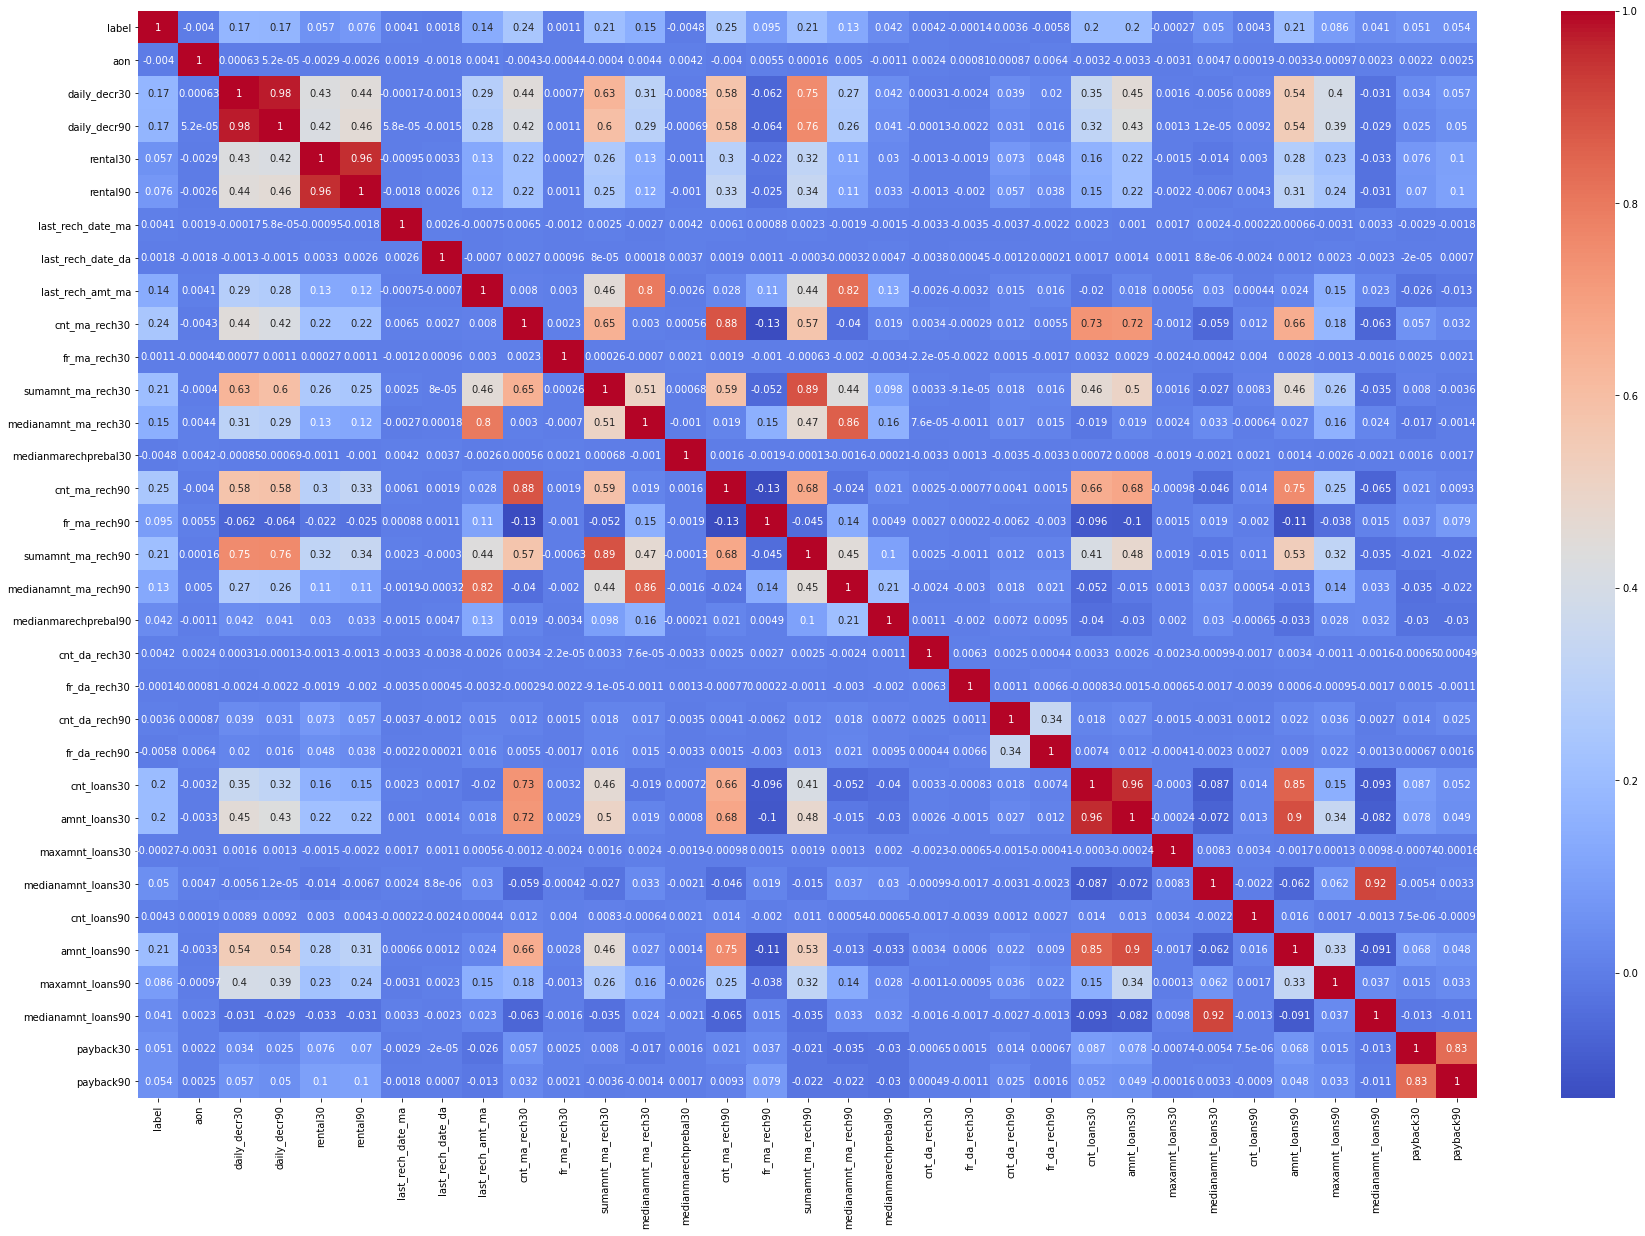

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

###### From the above correlation plot we can see that daily_decr30 and	daily_decr90 are highly correlated with each other. rental30 and rental90 both the columns are highly correlated with each other.  cnt_loans30 and	amnt_loans30 are also highly correlated with each other. medianamnt_loans30 and medianamnt_loans90 are highly correlated with each other.

### Data Cleaning

In [35]:
cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes == 'object':
        cat_columns.append(i)
cat_columns

['msisdn', 'pdate']

In [36]:
non_cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes != 'object':
        non_cat_columns.append(i)
non_cat_columns

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

### Skewness

In [37]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr30             4.003019
daily_decr90             4.301490
rental30                 4.676793
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
amnt_loans30             3.006644
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans9

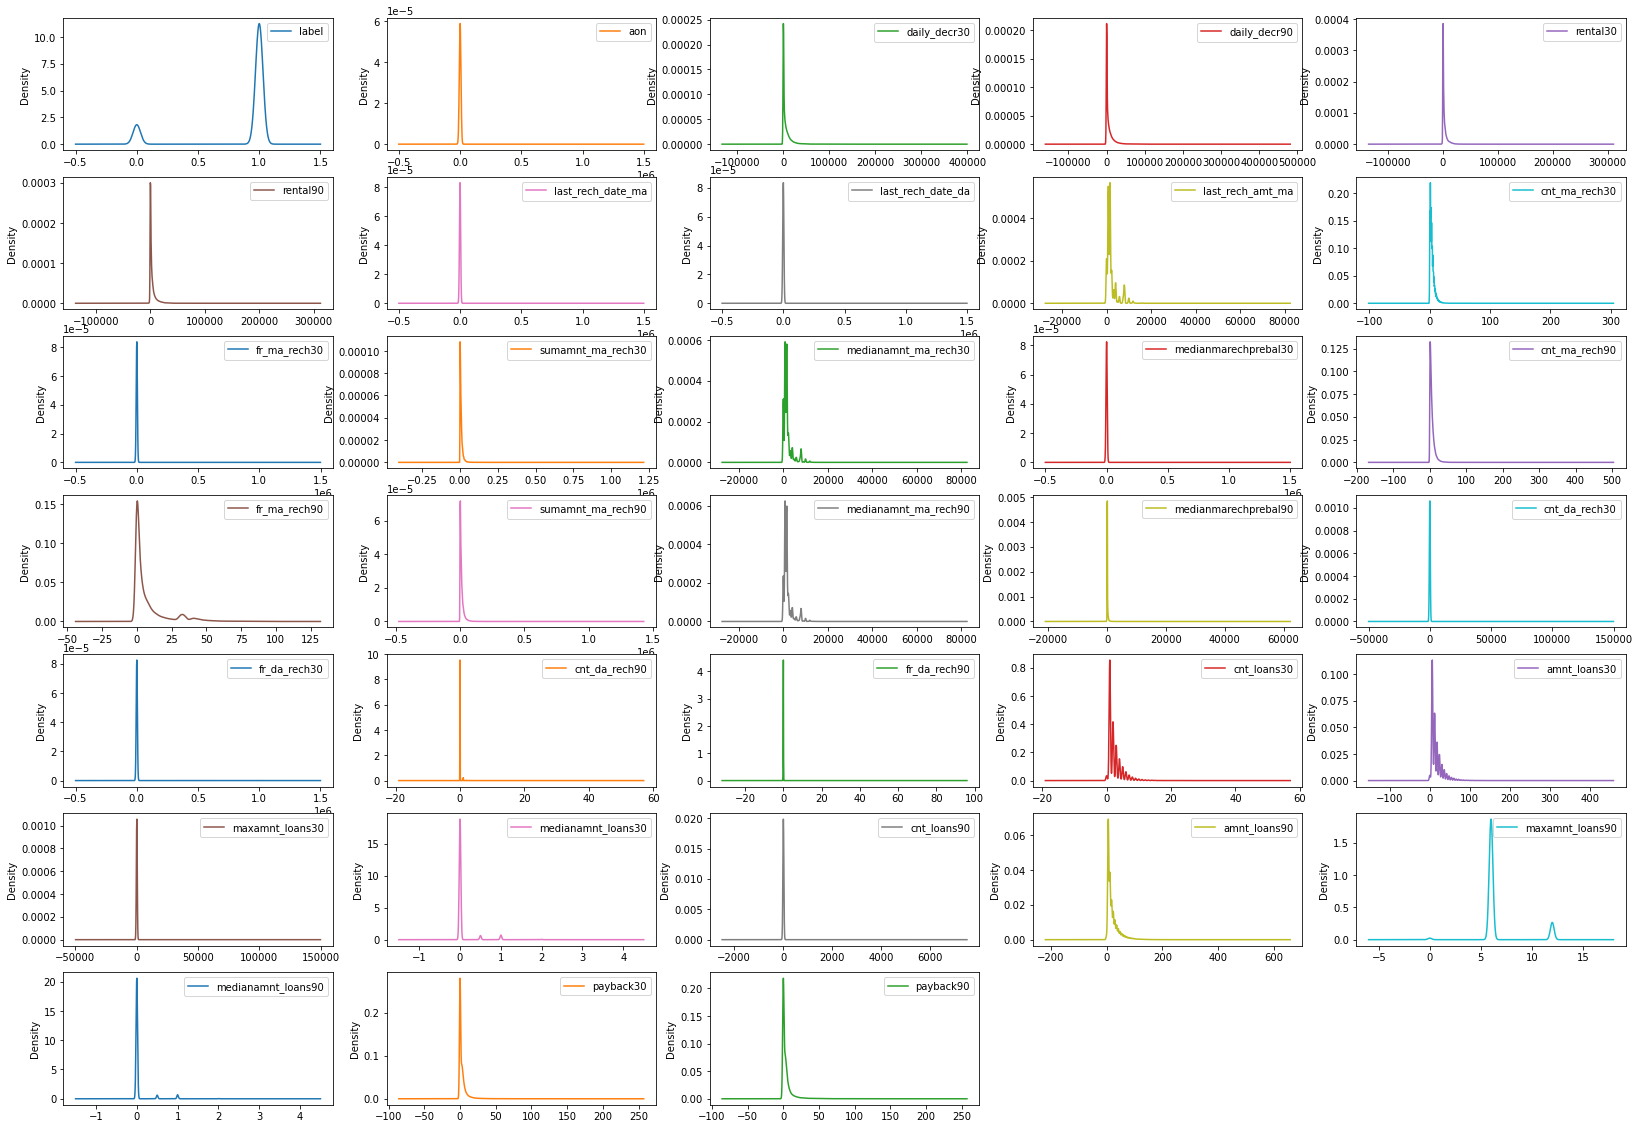

In [38]:
df.plot(kind = 'density',subplots = True, layout = (7,5), figsize=(28,20), sharex=False)
plt.show()

In [39]:
df.skew().sort_values(ascending=False)

medianmarechprebal90    43.576364
fr_da_rech90            28.959851
cnt_da_rech90           28.396293
cnt_da_rech30           17.749485
maxamnt_loans30         17.718074
cnt_loans90             16.717192
last_rech_date_ma       14.852116
fr_ma_rech30            14.822224
last_rech_date_da       14.781824
fr_da_rech30            14.728609
medianmarechprebal30    14.677544
aon                     10.365026
payback30                8.193009
sumamnt_ma_rech30        7.134012
payback90                6.763241
sumamnt_ma_rech90        5.231693
medianamnt_loans90       4.774958
rental30                 4.676793
rental90                 4.530925
medianamnt_loans30       4.470128
daily_decr90             4.301490
daily_decr30             4.003019
last_rech_amt_ma         3.830612
medianamnt_ma_rech90     3.753115
cnt_ma_rech90            3.558616
medianamnt_ma_rech30     3.519213
cnt_ma_rech30            3.471313
amnt_loans90             3.165962
amnt_loans30             3.006644
cnt_loans30   

### Data Conversion

In [40]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [41]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = lec.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,1,22850,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,5.200000,5.200000,33
209587,1,37325,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,62
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,16
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,54


### Checking Outliers

In [43]:
df_cat_columns = df[cat_columns]
df_cat_columns

,msisdn,pdate
0,40191,49
1,142291,70
2,33594,79
3,104157,5
4,6910,21
...,...,...
209585,22850,33
209587,37325,62
209588,42866,16
209591,111388,54


In [44]:
df_non_cat_columns = df[non_cat_columns]
df_non_cat_columns

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,1,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,5.200000,5.200000
209587,1,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


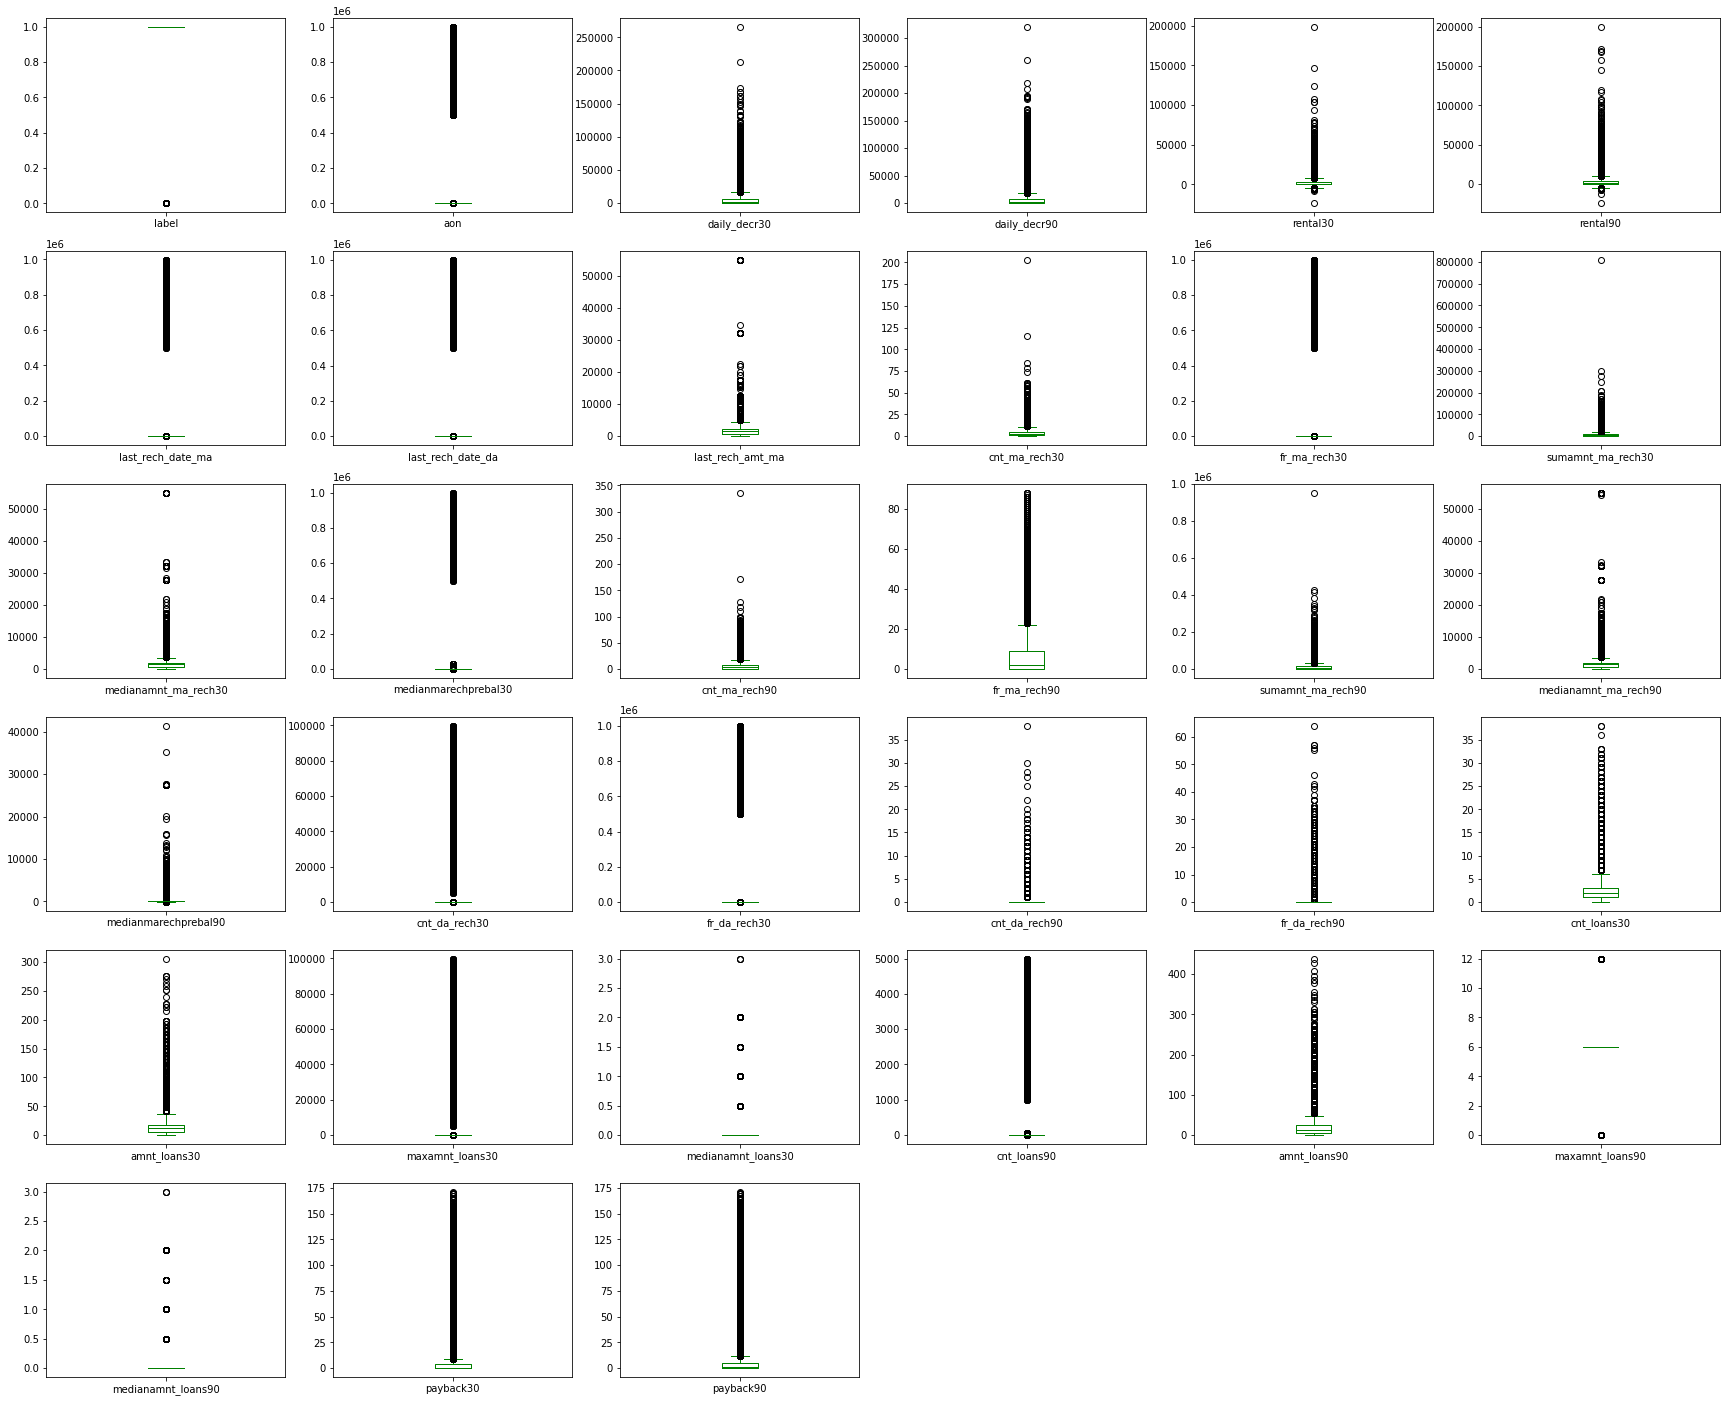

In [45]:
df_non_cat_columns.plot(kind = 'box',subplots=True,layout=(6,6),figsize=(30,25),sharex=True,color='g')
plt.show()

###### We can see that outliers are present in all the columns.

### Removing Outliers

#### Z Score technique

In [46]:
from scipy.stats import zscore

In [47]:
z = np.abs(zscore(df))
z.shape

(186243, 35)

In [48]:
df = df[(z<3).all(axis=1)]
df.shape

(143188, 35)

### Percentage Data Loss

In [49]:
percentage_data_loss = (186243-151452)/186243*100
percentage_data_loss

18.680433627035647

### VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending = False))

In [52]:
calculate_vif(df_non_cat_columns)

,Features,VIF_Values
24,amnt_loans30,47.900551
3,daily_decr90,40.919124
2,daily_decr30,38.289361
23,cnt_loans30,37.122531
14,cnt_ma_rech90,26.303092
9,cnt_ma_rech30,25.738964
16,sumamnt_ma_rech90,22.197275
11,sumamnt_ma_rech30,19.161560
5,rental90,18.519767
4,rental30,17.963209


In [53]:
df.drop(['amnt_loans30','daily_decr90','daily_decr30','cnt_loans30','cnt_ma_rech90',
         'cnt_ma_rech30','sumamnt_ma_rech90','sumamnt_ma_rech30'],axis=1,inplace=True)

In [54]:
df.head()

,label,msisdn,aon,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,220.13,260.13,2.0,0.0,1539,21.0,1539.0,7.50,21,1539.0,7.50,0.0,0.0,0,0,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,49
1,1,142291,712.0,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,61.04,0,5787.0,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,70
2,1,33594,535.0,900.13,900.13,3.0,0.0,1539,0.0,1539.0,66.32,0,1539.0,66.32,0.0,0.0,0,0,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,79
3,1,104157,241.0,159.42,159.42,41.0,0.0,947,0.0,0.0,0.00,0,947.0,2.50,0.0,0.0,0,0,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,5
4,1,6910,947.0,1098.90,1098.90,4.0,0.0,2309,2.0,2309.0,29.00,2,2888.0,35.00,0.0,0.0,0,0,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,21


In [55]:
df.shape

(143188, 27)

###### We dropped some columns from dataset because it has highest variance inflation factor.

### Splitting the Dataframe into dfx and dfy

In [56]:
dfx = df.drop('label',axis=1)
dfx.shape

(143188, 26)

In [57]:
dfy = df['label']
dfy.shape

(143188,)

### Balancing the Dataset

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE()
x,y = sm.fit_resample(dfx,dfy)

In [60]:
x.shape

(241968, 26)

(241968,)
0    120984
1    120984
Name: label, dtype: int64



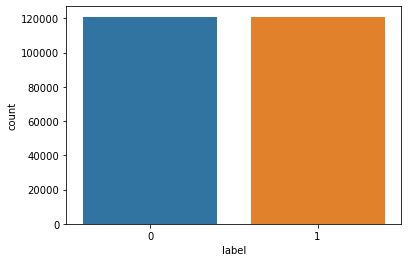

In [61]:
print(y.shape)
print(y.value_counts())
print()
sns.countplot(y)
plt.show()

###### We normalize the data using SMOTE

### Normalizing Using Power Transform

In [62]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [63]:
type(x_new)

numpy.ndarray

In [64]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,msisdn,aon,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,-0.926410,-0.621183,-0.565836,-0.555521,-0.395696,-0.097346,0.471221,1.666062,0.594249,-0.329865,1.490962,0.511317,-0.396763,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,0.493013,0.493707,-1.665335e-16,-0.162266,1.724230,1.703542,0.937342
1,0.901922,0.397358,0.774446,0.552947,1.242351,-0.097346,1.636541,-0.904420,1.653330,0.164472,-0.952113,1.747859,0.167384,-0.103292,0.0,-0.110484,0.0,2.584449,-0.175992,-0.902984,0.493707,1.998401e-15,-0.162266,-0.703402,-0.765049,1.743693
2,-1.077151,0.025471,-0.255220,-0.310118,-0.275276,-0.097346,0.471221,-0.904420,0.594249,0.206888,-0.952113,0.511317,0.217005,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,-0.902984,-0.927003,-1.665335e-16,-0.162266,-0.703402,-0.765049,2.057162
3,0.289567,-0.709563,-0.598124,-0.600482,2.684136,-0.097346,0.148796,-0.904420,-1.513948,-0.430549,-0.952113,0.172969,-0.464754,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,0.493013,0.493707,-1.665335e-16,-0.162266,-0.703402,-0.765049,-1.613373
4,-1.828074,0.844730,-0.173040,-0.240888,-0.162468,-0.097346,0.779670,0.615174,0.879037,-0.110917,0.352596,1.034842,-0.088482,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,1.664274,1.600982,-1.665335e-16,-0.162266,1.227716,1.008414,-0.423120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241963,1.115644,-0.965683,-0.661402,-0.654627,-0.470155,-0.097346,0.026017,1.329799,0.176273,-0.214507,1.049851,0.044863,-0.268454,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,0.612066,0.493707,-1.665335e-16,-0.162266,1.517564,1.367633,-0.669259
241964,-0.314913,-0.891853,-0.663824,-0.638044,0.819848,-0.097346,0.471221,1.532191,0.382934,0.007554,1.475121,0.452319,-0.204081,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,-0.538163,-0.537895,-1.665335e-16,-0.162266,-0.703402,-0.765049,0.502318
241965,0.676398,1.466524,0.230823,0.098264,1.922699,-0.097346,0.478160,-0.904420,0.597626,-7.818942,-0.952113,0.515141,-7.070111,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,-0.856845,-0.927003,-1.665335e-16,-0.162266,0.104596,-0.090871,-0.034557
241966,1.250651,-1.382573,-0.615776,-0.607412,-0.467640,-0.097346,0.026017,-0.904420,0.176314,0.025317,-0.952113,0.044908,0.005588,-0.103292,0.0,-0.110484,0.0,-0.158131,-0.175992,-0.902984,-0.927003,-1.665335e-16,-0.162266,-0.703402,-0.765049,-0.482722


In [65]:
x.skew()

msisdn                  -0.290775
aon                      0.350856
rental30                -0.172274
rental90                -0.131435
last_rech_date_ma       -0.614472
last_rech_date_da      -70.037461
last_rech_amt_ma        -0.438228
fr_ma_rech30             0.383489
medianamnt_ma_rech30    -0.465440
medianmarechprebal30     1.665218
fr_ma_rech90             0.331439
medianamnt_ma_rech90    -0.456312
medianmarechprebal90     0.794423
cnt_da_rech30            9.582681
fr_da_rech30             0.000000
cnt_da_rech90            8.940679
fr_da_rech90             0.000000
maxamnt_loans30         -1.385309
medianamnt_loans30       5.512111
cnt_loans90              0.450100
amnt_loans90             0.385250
maxamnt_loans90          0.000000
medianamnt_loans90       6.006739
payback30                0.764151
payback90                0.609534
pdate                   -0.108852
dtype: float64

In [66]:
x.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis=1,inplace=True)
x.shape

(241968, 21)

###### We dropped the columns from dataset because it has still skewness aftr using the power transformation method.

### Scaling the Model

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,msisdn,aon,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,fr_da_rech90,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate
0,-0.926410,-0.621183,-0.565836,-0.555521,-0.395696,0.471221,1.666062,0.594249,-0.329865,1.490962,0.511317,-0.396763,0.0,0.0,-0.158131,0.493013,0.493707,-0.286451,1.724230,1.703542,0.937342
1,0.901922,0.397358,0.774446,0.552947,1.242351,1.636541,-0.904420,1.653330,0.164472,-0.952113,1.747859,0.167384,0.0,0.0,2.584449,-0.902984,0.493707,3.514370,-0.703402,-0.765049,1.743693
2,-1.077151,0.025471,-0.255220,-0.310118,-0.275276,0.471221,-0.904420,0.594249,0.206888,-0.952113,0.511317,0.217005,0.0,0.0,-0.158131,-0.902984,-0.927003,-0.286451,-0.703402,-0.765049,2.057162
3,0.289567,-0.709563,-0.598124,-0.600482,2.684136,0.148796,-0.904420,-1.513948,-0.430549,-0.952113,0.172969,-0.464754,0.0,0.0,-0.158131,0.493013,0.493707,-0.286451,-0.703402,-0.765049,-1.613373
4,-1.828074,0.844730,-0.173040,-0.240888,-0.162468,0.779670,0.615174,0.879037,-0.110917,0.352596,1.034842,-0.088482,0.0,0.0,-0.158131,1.664274,1.600982,-0.286451,1.227716,1.008414,-0.423120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241963,1.115644,-0.965683,-0.661402,-0.654627,-0.470155,0.026017,1.329799,0.176273,-0.214507,1.049851,0.044863,-0.268454,0.0,0.0,-0.158131,0.612066,0.493707,-0.286451,1.517564,1.367633,-0.669259
241964,-0.314913,-0.891853,-0.663824,-0.638044,0.819848,0.471221,1.532191,0.382934,0.007554,1.475121,0.452319,-0.204081,0.0,0.0,-0.158131,-0.538163,-0.537895,-0.286451,-0.703402,-0.765049,0.502318
241965,0.676398,1.466524,0.230823,0.098264,1.922699,0.478160,-0.904420,0.597626,-7.818942,-0.952113,0.515141,-7.070111,0.0,0.0,-0.158131,-0.856845,-0.927003,-0.286451,0.104596,-0.090871,-0.034557
241966,1.250651,-1.382573,-0.615776,-0.607412,-0.467640,0.026017,-0.904420,0.176314,0.025317,-0.952113,0.044908,0.005588,0.0,0.0,-0.158131,-0.902984,-0.927003,-0.286451,-0.703402,-0.765049,-0.482722


### Training Process

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [69]:
lr = LogisticRegression()
lr

LogisticRegression()

### Best Random State

In [70]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if maxAccu<acc:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is',maxAccu,'on Random State',maxRs)

Best Accuracy Score is 0.7592814536237275 on Random State 73


In [71]:
from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv = cross_val_score(lr,x,y,cv=j)
    cv_score = np.abs(cv.mean())
    print('For crossfold',j,'cv score is',cv_score,'Accuracy score is',maxAccu)

For crossfold 2 cv score is 0.7556991007075315 Accuracy score is 0.7592814536237275
For crossfold 3 cv score is 0.7559553329365866 Accuracy score is 0.7592814536237275
For crossfold 4 cv score is 0.7560297229385704 Accuracy score is 0.7592814536237275
For crossfold 5 cv score is 0.7561412944575756 Accuracy score is 0.7592814536237275
For crossfold 6 cv score is 0.7562074323877536 Accuracy score is 0.7592814536237275
For crossfold 7 cv score is 0.7563727276278748 Accuracy score is 0.7592814536237275
For crossfold 8 cv score is 0.756401672948489 Accuracy score is 0.7592814536237275
For crossfold 9 cv score is 0.7564595008669772 Accuracy score is 0.7592814536237275
For crossfold 10 cv score is 0.7563396471555092 Accuracy score is 0.7592814536237275
For crossfold 11 cv score is 0.756343809183024 Accuracy score is 0.7592814536237275
For crossfold 12 cv score is 0.7564099385042651 Accuracy score is 0.7592814536237275
For crossfold 13 cv score is 0.7564471208498318 Accuracy score is 0.7592814

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=73)

In [80]:
x_train.shape

(169377, 21)

In [81]:
x_test.shape

(72591, 21)

In [82]:
y_train.shape

(169377,)

In [83]:
y_test.shape

(72591,)

### Model Testing

In [84]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    Accuracy = accuracy_score(y_test,pred)*100
    print('Accuracy',Accuracy)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    cv = cross_val_score(model,x,y,cv = 9)
    cv_score = cv.mean()*100
    print('Cross validation score is ',cv_score)
    print('Difference between cv and accuracy score is ',Accuracy-cv_score)
    

### Logistic Regression

In [85]:
lr = LogisticRegression()
Model(lr)

Accuracy 75.92814536237275
[[27553  8846]
 [ 8628 27564]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     36399
           1       0.76      0.76      0.76     36192

    accuracy                           0.76     72591
   macro avg       0.76      0.76      0.76     72591
weighted avg       0.76      0.76      0.76     72591

Cross validation score is  75.64595008669772
Difference between cv and accuracy score is  0.2821952756750221


### Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 91.47414968797784
[[33392  3007]
 [ 3182 33010]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     36399
           1       0.92      0.91      0.91     36192

    accuracy                           0.91     72591
   macro avg       0.91      0.91      0.91     72591
weighted avg       0.91      0.91      0.91     72591

Cross validation score is  91.28487447147927
Difference between cv and accuracy score is  0.18927521649857226


### Extra Tree Classifier

In [87]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier()
Model(et)

Accuracy 83.2789188742406
[[30458  5941]
 [ 6197 29995]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     36399
           1       0.83      0.83      0.83     36192

    accuracy                           0.83     72591
   macro avg       0.83      0.83      0.83     72591
weighted avg       0.83      0.83      0.83     72591

Cross validation score is  84.23432502309875
Difference between cv and accuracy score is  -0.9554061488581453


### AdaBoost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
adb = AdaBoostClassifier()
Model(adb)

Accuracy 86.27791323993333
[[32416  3983]
 [ 5978 30214]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     36399
           1       0.88      0.83      0.86     36192

    accuracy                           0.86     72591
   macro avg       0.86      0.86      0.86     72591
weighted avg       0.86      0.86      0.86     72591

Cross validation score is  85.86966083757758
Difference between cv and accuracy score is  0.40825240235574256


### KNeighbour Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 84.8328305161797
[[32911  3488]
 [ 7522 28670]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86     36399
           1       0.89      0.79      0.84     36192

    accuracy                           0.85     72591
   macro avg       0.85      0.85      0.85     72591
weighted avg       0.85      0.85      0.85     72591

Cross validation score is  85.45965999304227
Difference between cv and accuracy score is  -0.626829476862568


### Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
Model(dt)

Accuracy 86.73664779380364
[[31788  4611]
 [ 5017 31175]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     36399
           1       0.87      0.86      0.87     36192

    accuracy                           0.87     72591
   macro avg       0.87      0.87      0.87     72591
weighted avg       0.87      0.87      0.87     72591

Cross validation score is  86.97521407285531
Difference between cv and accuracy score is  -0.2385662790516676


### Hyper Parameter Tuning

#### Random Forest Classifier

In [105]:
RandomForestClassifier()

RandomForestClassifier()

In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ["gini", "entropy"],
             'max_features' : ["auto", "sqrt", "log2"],
             'class_weight' : ["balanced", "balanced_subsample"]}

In [107]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2'}

In [108]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9142042401950655

#### Lgistic Regression

In [ ]:
LogisticRegression()

In [97]:
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class' : ['auto', 'ovr', 'multinomial']}

In [100]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=9,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [101]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7592539019988703

#### AdaBoost Classifier

In [103]:
AdaBoostClassifier()

AdaBoostClassifier()

In [109]:
parameters = {'algorithm' : ['SAMME', 'SAMME.R'],
             'n_estimators' : [50],
             'random_state' : [1]}

In [110]:
GCV = GridSearchCV(AdaBoostClassifier(),parameters,cv=9,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 50, 'random_state': 1}

In [111]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8627791323993332

###### From the calculation we can see that accuracy of model with and without hyper parameter tuning is same. The accuracy for Random Forest Classifier is highest than other models so, we choose Random Forest as our final model.

### ROC AUC Curve

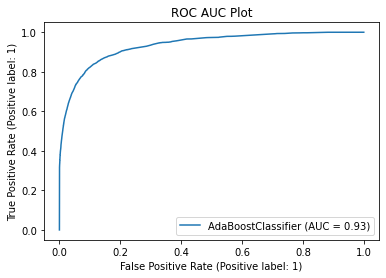

In [112]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

### Saving the Model

In [114]:
import joblib
joblib.dump(GCV.best_estimator_,'MICROCREDIT.pkl')

['MICROCREDIT.pkl']